In [1]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import spearmanr

In [4]:
from access_biology_data import meta, relations, annotation, properties
from access_literature_data import medline
from access_science_shared import standardizer

import sys
sys.path.append('./../src/')
from aging_tools import inout, export, calculators
from access_aging_data import chaperome, earlier_studies, sequencing


In [5]:
out_folder = '211210_compare_cross_validation'
save_images = True

In [6]:
import random

In [7]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})

In [8]:
in_monte_carlo = '190407_visualize_mouse_models/table_211210_1137.csv'
in_four_fold = '191023_visualize_four_fold_mouse_models/table_211210_1131.csv'

In [9]:
monte_carlo = pd.read_csv(export.get_material_path(in_monte_carlo))

In [10]:
four_fold = pd.read_csv(export.get_material_path(in_four_fold))

In [11]:
together = pd.concat([
    monte_carlo.set_index('tissue').stack().to_frame('monte_carlo'),
    four_fold.set_index('tissue').stack().to_frame('four_fold'),
], axis=1
)

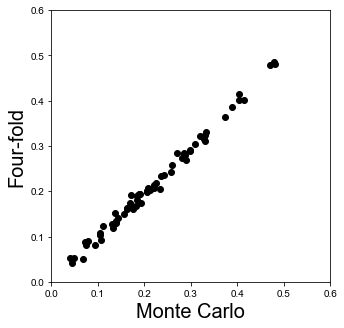

In [12]:
plt.figure(figsize=(5, 5))
plt.scatter(together['monte_carlo'], together['four_fold'], color='black')
plt.xlim(0, 0.6)
plt.ylim(0, 0.6)
plt.xlabel('Monte Carlo', fontsize=20)
plt.ylabel('Four-fold', fontsize=20)

if save_images:
    export.export_image(
    '{}/comparison_of_cross_validation.pdf'.format(out_folder))